# Mouvement : Extension du rachis 
## Data : Patients lombaligues et volontaires sains 

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

In [105]:
os.chdir('C:\\Users\\Eya\\Desktop\\Xsens\\LOMBALGIE\\sujets_lombalgiques_mars_2022\\PRE') 
#La méthode Python os.chdir() remplace le répertoire de travail actuel par le chemin donné.

In [106]:
#Ce bloc concerne les données des personnes lombalgiques

VM=[]
AM=[]
VAM=[]
AAM=[]
CMM=[]
VCMM=[]
ACMM=[]
AT1M=[]
AT2M=[]

#Toutes les listes initialisés à [], prenderont les valeurs quadratiques moyennes des paramétres suivants : 
#vitesse, accélération, vitesse angulaire, accélération angulaire, centre de masse, vitesse de centre de masse, 
#accélération de centre de masse, angle 1 et angle2.

#Les angles 1 et 2 correspondent au ROM, qui est l'Amplitude du mouvement (de l’anglais Range Of Motion).
#Elles renseignent sur la capacité d’une articulation à effectuer l’ensemble de ses mouvements.

#Pour le mouvement "Extension du rachis", les deux angles sont : "Angle d’extension maximal entre la verticale et le pelvis",
#et "Angle d’extension maximal entre la verticale et le thorax (T8)".


Files=['LIEURAIN\\LIEURAIN-003.xlsx','BUTSCHER\\BUTSCHER-002.xlsx','ADJADJ\\Extension_001.xlsx','BENHAMMADI\\extension_001.xlsx' , 'GIMENO\\GIMEMO-002.xlsx']

#La liste files contient les noms des fichiers cotenant les données des sujets lombalgiques

for i in range (len(Files)) :
    File=Files[i]
    vitesse=pd.read_excel(File, sheet_name ="Segment Velocity")
    acceleration=pd.read_excel(File, sheet_name ="Segment Acceleration")
    vitesse_angulaire=pd.read_excel(File, sheet_name ="Segment Angular Velocity")
    acceleration_angulaire=pd.read_excel(File, sheet_name ="Segment Angular Acceleration")
    centre_mass=pd.read_excel(File, sheet_name ="Center of Mass")
    angles=pd.read_excel(File, sheet_name ="Ergonomic Joint Angles ZXY")
    
    
# A chaque fichier de la liste Files, les sheets à utiliser sont extractés dans des variables.
    
    vitesse.drop( vitesse[ (vitesse['Frame'] > 3000) ].index, inplace=True)
    acceleration.drop( acceleration[ (acceleration['Frame'] > 3000) ].index, inplace=True)
    vitesse_angulaire.drop( vitesse_angulaire[ (vitesse_angulaire['Frame'] > 3000) ].index, inplace=True)
    acceleration_angulaire.drop( acceleration_angulaire[ (acceleration_angulaire['Frame'] > 3000) ].index, inplace=True)
    centre_mass.drop( centre_mass[ (centre_mass['Frame'] > 3000) ].index, inplace=True)
    angles.drop( angles[ (angles['Frame'] > 3000) ].index, inplace=True)
    
# Nous avons fixés la valeur maximale des frames dans chaque fichier à 3000, pour que tous les fichiers soient de meme taille.   
    
    Frame=vitesse.loc[:,'Frame']

    
    V1=vitesse.loc[:,vitesse.columns[13]] #Velocity of T8
    V2=vitesse.loc[:,vitesse.columns[14]]
    V3=vitesse.loc[:,vitesse.columns[15]]

# On extracte dans V1, les vitesses correspondantes à l'axe des x, dans V2 celles correspondantes à l'axe des y et dans V3
#celles correspondantes à l'axe des z.

# De meme pour les autres
    
    A1=acceleration.loc[:,acceleration.columns[13]] #Acceleration of T8
    A2=acceleration.loc[:,acceleration.columns[14]]
    A3=acceleration.loc[:,acceleration.columns[15]]

    
    VA1=vitesse_angulaire.loc[:,vitesse_angulaire.columns[13]] #Angular Velocity of T8
    VA2=vitesse_angulaire.loc[:,vitesse_angulaire.columns[14]]
    VA3=vitesse_angulaire.loc[:,vitesse_angulaire.columns[15]]
    
    
    AA1=acceleration_angulaire.loc[:,acceleration_angulaire.columns[13]] #Angular acceleration of T8
    AA2=acceleration_angulaire.loc[:,acceleration_angulaire.columns[14]]
    AA3=acceleration_angulaire.loc[:,acceleration_angulaire.columns[15]]
    
    
    CM1=centre_mass.loc[:,centre_mass.columns[1]] #Center of Mass 
    CM2=centre_mass.loc[:,centre_mass.columns[2]]
    CM3=centre_mass.loc[:,centre_mass.columns[3]]
    
    VCM1=centre_mass.loc[:,centre_mass.columns[4]] #Velocity of Center of Mass 
    VCM2=centre_mass.loc[:,centre_mass.columns[5]]
    VCM3=centre_mass.loc[:,centre_mass.columns[6]]
    
    ACM1=centre_mass.loc[:,centre_mass.columns[7]] #Acceleration of Center of Mass 
    ACM2=centre_mass.loc[:,centre_mass.columns[8]]
    ACM3=centre_mass.loc[:,centre_mass.columns[9]]
    
    
    AT1=angles.loc[:,angles.columns[12]] #Angles of T8
    AT2=angles.loc[:,angles.columns[15]] 
    
    
    AT1M.append(np.max(AT1))
    AT2M.append(np.max(AT2))
    
    
    V=[]
    A=[]
    VA=[]
    AA=[]
    CM=[]
    VCM=[]
    ACM=[]
    

    for  k in range(len(V1)) :
        V.append (np.sqrt (V1[k] * V1[k] + V2[k] *V2[k] + V3[k] *V3[k]))
    mean = np.mean(V)
    VM.append(mean)
    
# VM contient les vitesses quadratiques moyennes
# De meme pour les autres


    for  k in range(len(A1)) :
        A.append (np.sqrt (A1[k] * A1[k] + A2[k] *A2[k] + A3[k] *A3[k]))
    mean = np.mean(A)
    AM.append(mean)

    
    for  k in range(len(VA1)) :
        VA.append (np.sqrt (VA1[k] * VA1[k] + VA2[k] *VA2[k] + VA3[k] *VA3[k]))
    mean = np.mean(VA)
    VAM.append(mean)
    
    
    for  k in range(len(AA1)) :
        AA.append (np.sqrt (AA1[k] * AA1[k] + AA2[k] *AA2[k] + AA3[k] *AA3[k]))
    mean = np.mean(AA)
    AAM.append(mean)
    
    
    for  k in range(len(CM1)) :
        CM.append (np.sqrt (CM1[k] * CM1[k] + CM2[k] *CM2[k] + CM3[k] *CM3[k]))
    mean = np.mean(CM)
    CMM.append(mean)
    
    for  k in range(len(VCM1)) :
        VCM.append (np.sqrt (VCM1[k] * VCM1[k] + VCM2[k] *VCM2[k] + VCM3[k] *VCM3[k]))
    mean = np.mean(VCM)
    VCMM.append(mean)
    
    for  k in range(len(ACM1)) :
        ACM.append (np.sqrt (ACM1[k] * ACM1[k] + ACM2[k] *ACM2[k] + ACM3[k] *ACM3[k]))
    mean = np.mean(ACM)
    ACMM.append(mean)
    
    

    

In [107]:
os.chdir('C:\\Users\\Eya\\Desktop\\Xsens\\LOMBALGIE\\SUJETS_SAINS')

In [108]:
#Ce bloc concerne les données des personnes sains 

# Le meme démarche a été fait comme le bloc précédent.

Files=['thierry\\thierry-002.xlsx' , 'Unai G\\Unai-003.xlsx' , 'Isabel Tavares\\ExtensionDos_001.xlsx','estelle ARGOTTI\\estelle-003.xlsx' , 'Barbara Rider\\TEST-002.xlsx']
for i in range (len(Files)) :
    File=Files[i]
    vitesse=pd.read_excel(File, sheet_name ="Segment Velocity")
    acceleration=pd.read_excel(File, sheet_name ="Segment Acceleration")
    vitesse_angulaire=pd.read_excel(File, sheet_name ="Segment Angular Velocity")
    acceleration_angulaire=pd.read_excel(File, sheet_name ="Segment Angular Acceleration")
    centre_mass=pd.read_excel(File, sheet_name ="Center of Mass")
    angles=pd.read_excel(File, sheet_name ="Ergonomic Joint Angles ZXY")
    
    
    
    
    vitesse.drop( vitesse[ (vitesse['Frame'] > 3000) ].index, inplace=True)
    acceleration.drop( acceleration[ (acceleration['Frame'] > 3000) ].index, inplace=True)
    vitesse_angulaire.drop( vitesse_angulaire[ (vitesse_angulaire['Frame'] > 3000) ].index, inplace=True)
    acceleration_angulaire.drop( acceleration_angulaire[ (acceleration_angulaire['Frame'] > 3000) ].index, inplace=True)
    centre_mass.drop( centre_mass[ (centre_mass['Frame'] > 3000) ].index, inplace=True)
    angles.drop( angles[ (angles['Frame'] > 3000) ].index, inplace=True)
    
    Frame=vitesse.loc[:,'Frame']

    
    V1=vitesse.loc[:,vitesse.columns[13]] #Velocity of T8
    V2=vitesse.loc[:,vitesse.columns[14]]
    V3=vitesse.loc[:,vitesse.columns[15]]
    
    A1=acceleration.loc[:,acceleration.columns[13]] #Acceleration of T8
    A2=acceleration.loc[:,acceleration.columns[14]]
    A3=acceleration.loc[:,acceleration.columns[15]]

    
    VA1=vitesse_angulaire.loc[:,vitesse_angulaire.columns[13]] #Angular Velocity of T8
    VA2=vitesse_angulaire.loc[:,vitesse_angulaire.columns[14]]
    VA3=vitesse_angulaire.loc[:,vitesse_angulaire.columns[15]]
    
    
    AA1=acceleration_angulaire.loc[:,acceleration_angulaire.columns[13]] #Angular acceleration of T8
    AA2=acceleration_angulaire.loc[:,acceleration_angulaire.columns[14]]
    AA3=acceleration_angulaire.loc[:,acceleration_angulaire.columns[15]]
    
    
    CM1=centre_mass.loc[:,centre_mass.columns[1]] #Center of Mass 
    CM2=centre_mass.loc[:,centre_mass.columns[2]]
    CM3=centre_mass.loc[:,centre_mass.columns[3]]
    
    VCM1=centre_mass.loc[:,centre_mass.columns[4]] #Velocity of Center of Mass 
    VCM2=centre_mass.loc[:,centre_mass.columns[5]]
    VCM3=centre_mass.loc[:,centre_mass.columns[6]]
    
    ACM1=centre_mass.loc[:,centre_mass.columns[7]] #Acceleration of Center of Mass 
    ACM2=centre_mass.loc[:,centre_mass.columns[8]]
    ACM3=centre_mass.loc[:,centre_mass.columns[9]]
    
    
    AT1=angles.loc[:,angles.columns[12]] #Angles of T8
    AT2=angles.loc[:,angles.columns[15]] 
    
    
    AT1M.append(np.mean(AT1))
    AT2M.append(np.mean(AT2))
    
    
    V=[]
    A=[]
    VA=[]
    AA=[]
    CM=[]
    VCM=[]
    ACM=[]
    

    for  k in range(len(V1)) :
        V.append (np.sqrt (V1[k] * V1[k] + V2[k] *V2[k] + V3[k] *V3[k]))
    mean = np.mean(V)
    VM.append(mean)
    
    
    for  k in range(len(A1)) :
        A.append (np.sqrt (A1[k] * A1[k] + A2[k] *A2[k] + A3[k] *A3[k]))
    mean = np.mean(A)
    AM.append(mean)

    
    for  k in range(len(VA1)) :
        VA.append (np.sqrt (VA1[k] * VA1[k] + VA2[k] *VA2[k] + VA3[k] *VA3[k]))
    mean = np.mean(VA)
    VAM.append(mean)
    
    
    for  k in range(len(AA1)) :
        AA.append (np.sqrt (AA1[k] * AA1[k] + AA2[k] *AA2[k] + AA3[k] *AA3[k]))
    mean = np.mean(AA)
    AAM.append(mean)
    
    
    for  k in range(len(CM1)) :
        CM.append (np.sqrt (CM1[k] * CM1[k] + CM2[k] *CM2[k] + CM3[k] *CM3[k]))
    mean = np.mean(CM)
    CMM.append(mean)
    
    for  k in range(len(VCM1)) :
        VCM.append (np.sqrt (VCM1[k] * VCM1[k] + VCM2[k] *VCM2[k] + VCM3[k] *VCM3[k]))
    mean = np.mean(VCM)
    VCMM.append(mean)
    
    for  k in range(len(ACM1)) :
        ACM.append (np.sqrt (ACM1[k] * ACM1[k] + ACM2[k] *ACM2[k] + ACM3[k] *ACM3[k]))
    mean = np.mean(ACM)
    ACMM.append(mean)
    
    

    

### Construction de la base de données

In [153]:
# Création de la colonne Personne
columns = ['Personne']

In [154]:
index = [1,2,3,4,5,6,7,8,9,10]

In [155]:
data = [1,2,3,4,5,6,7,8,9,10]

In [156]:
df = pd.DataFrame(data=data,index=index,columns=columns)
df

,Personne
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9
10,10


In [165]:
# Création des autres colonnes de la base

df['Vitesse quadratique moyenne'] = VM
df['Accéleration quadratique moyenne']=AM
df['vitesse angulaire moyenne']=VAM
df['acceleration angulaire moyenne']=AAM
df['centre de masse moyen']=CMM
df['vitesse de centre de masse moyenne']=VCMM
df['acceleration de centre de masse moyenne']=ACMM
df['angle1']=AT1M
df['angle2']=AT2M

In [177]:
df

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,centre de masse moyen,acceleration de centre de masse moyenne,angle1,angle2,vitesse angulaire moyenne,acceleration angulaire moyenne,vitesse de centre de masse moyenne
1,1,0.088129,0.372414,2.545982,0.181312,4.944462,7.220784,0.386356,2.007141,4.591797e-02
2,2,0.169050,1.172249,2.759956,0.408659,6.560443,23.111439,0.512856,6.947285,8.859517e-02
3,3,0.080234,0.285283,1.823912,0.153858,6.255955,18.846133,0.307484,1.369508,3.473456e-02
4,4,0.042772,0.204505,2.201621,0.133541,-13.505002,16.895792,0.273512,1.325051,3.016698e-02
5,5,0.099894,0.282096,1.863105,0.131421,8.275950,10.266255,0.386053,1.449011,4.271759e-02
6,6,0.140703,0.710858,1.803930,0.295859,-17.797816,-0.147203,0.715306,4.411140,1.037751e+20
7,7,0.040229,0.205397,0.944860,0.100124,-15.595779,2.722685,0.230641,1.089484,2.157021e-02
8,8,0.098592,0.319519,0.985909,0.172258,-15.555762,2.500706,0.389558,1.663755,4.719750e-02
9,9,0.091834,0.285275,0.969427,0.133203,-16.459523,1.779652,0.411154,1.260415,9.681205e+39
10,10,0.091292,0.374042,0.880279,0.216462,-19.775901,-6.196245,0.499045,2.193129,5.750383e+50


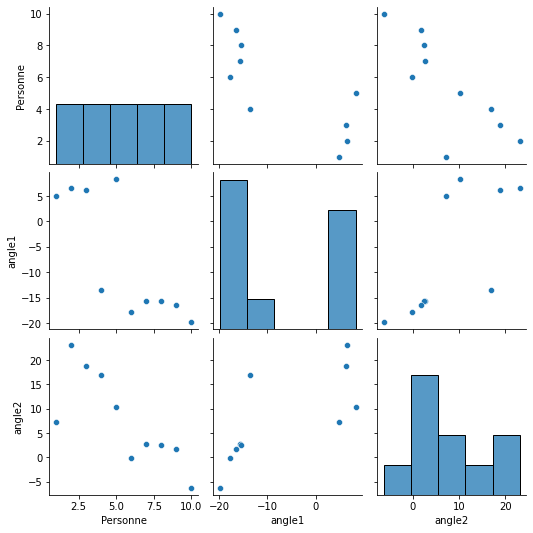

In [184]:
# Tracer la relation entre les deux angles

sns.pairplot(df[['Personne','angle1','angle2']] )

In [ ]:
df.drop(columns=['vitesse angulaire moyenne','acceleration angulaire moyenne','vitesse de centre de masse moyenne'],inplace=True)

In [162]:
df

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,centre de masse moyen,acceleration de centre de masse moyenne,angle1,angle2
1,1,0.088129,0.372414,2.545982,0.181312,4.944462,7.220784
2,2,0.169050,1.172249,2.759956,0.408659,6.560443,23.111439
3,3,0.080234,0.285283,1.823912,0.153858,6.255955,18.846133
4,4,0.042772,0.204505,2.201621,0.133541,-13.505002,16.895792
5,5,0.099894,0.282096,1.863105,0.131421,8.275950,10.266255
6,6,0.140703,0.710858,1.803930,0.295859,-17.797816,-0.147203
7,7,0.040229,0.205397,0.944860,0.100124,-15.595779,2.722685
8,8,0.098592,0.319519,0.985909,0.172258,-15.555762,2.500706
9,9,0.091834,0.285275,0.969427,0.133203,-16.459523,1.779652
10,10,0.091292,0.374042,0.880279,0.216462,-19.775901,-6.196245


## Standardisation des données

In [118]:
df.mean(axis=0) #moyenne par colonne

Personne                                   5.500000
Vitesse quadratique moyenne                0.094273
Accéleration quadratique moyenne           0.421164
centre de masse moyen                      1.677898
acceleration de centre de masse moyenne    0.192670
angle1                                    -7.265297
angle2                                     7.700000
dtype: float64

In [119]:
df.std(axis=0) #écartype par colonne

Personne                                    3.027650
Vitesse quadratique moyenne                 0.038902
Accéleration quadratique moyenne            0.300508
centre de masse moyen                       0.701152
acceleration de centre de masse moyenne     0.093847
angle1                                     11.989021
angle2                                      9.396617
dtype: float64

In [120]:
dt = (df - df.mean(axis=0)) / (df.std(axis=0))  # pour la standardisation de la dataframe
dt

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,centre de masse moyen,acceleration de centre de masse moyenne,angle1,angle2
1,-1.486301,-0.157936,-0.162225,1.238081,-0.121022,1.018412,-0.050999
2,-1.156012,1.922182,2.499384,1.543257,2.301493,1.153200,1.640105
3,-0.825723,-0.360864,-0.452171,0.208248,-0.413564,1.127803,1.186186
4,-0.495434,-1.323860,-0.720976,0.746946,-0.630056,-0.520452,0.978628
5,-0.165145,0.144496,-0.462775,0.264147,-0.652644,1.296290,0.273104
6,0.165145,1.193509,0.964014,0.179749,1.099543,-0.878514,-0.835109
7,0.495434,-1.389234,-0.718007,-1.045476,-0.986125,-0.694843,-0.529692
8,0.825723,0.111031,-0.338244,-0.986931,-0.217496,-0.691505,-0.553315
9,1.156012,-0.062699,-0.452196,-1.010439,-0.633653,-0.766887,-0.630051
10,1.486301,-0.076626,-0.156805,-1.137583,0.253524,-1.043505,-1.478856


In [121]:
dt.mean(axis=0) 

Personne                                   0.000000e+00
Vitesse quadratique moyenne                1.387779e-16
Accéleration quadratique moyenne           4.718448e-17
centre de masse moyen                     -1.332268e-16
acceleration de centre de masse moyenne    2.942091e-16
angle1                                     2.220446e-17
angle2                                     1.110223e-16
dtype: float64

In [122]:
dt.std(axis=0) #Les écartypes des colonnes sont bien égales à 1

Personne                                   1.0
Vitesse quadratique moyenne                1.0
Accéleration quadratique moyenne           1.0
centre de masse moyen                      1.0
acceleration de centre de masse moyenne    1.0
angle1                                     1.0
angle2                                     1.0
dtype: float64

# Apprentissage non supervisé
## Application du modéle KMeans

In [123]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [124]:
model = KMeans(n_clusters=2) #KMeans avec 2 groupes
model.fit(dt) # fit du  Training set

KMeans(n_clusters=2)

In [125]:
model.labels_  #affiche le numéro de cluster affectés aux groupes

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [126]:
np.unique(model.labels_,return_counts=True) #effectifs par groupe 

(array([0, 1]), array([5, 5], dtype=int64))

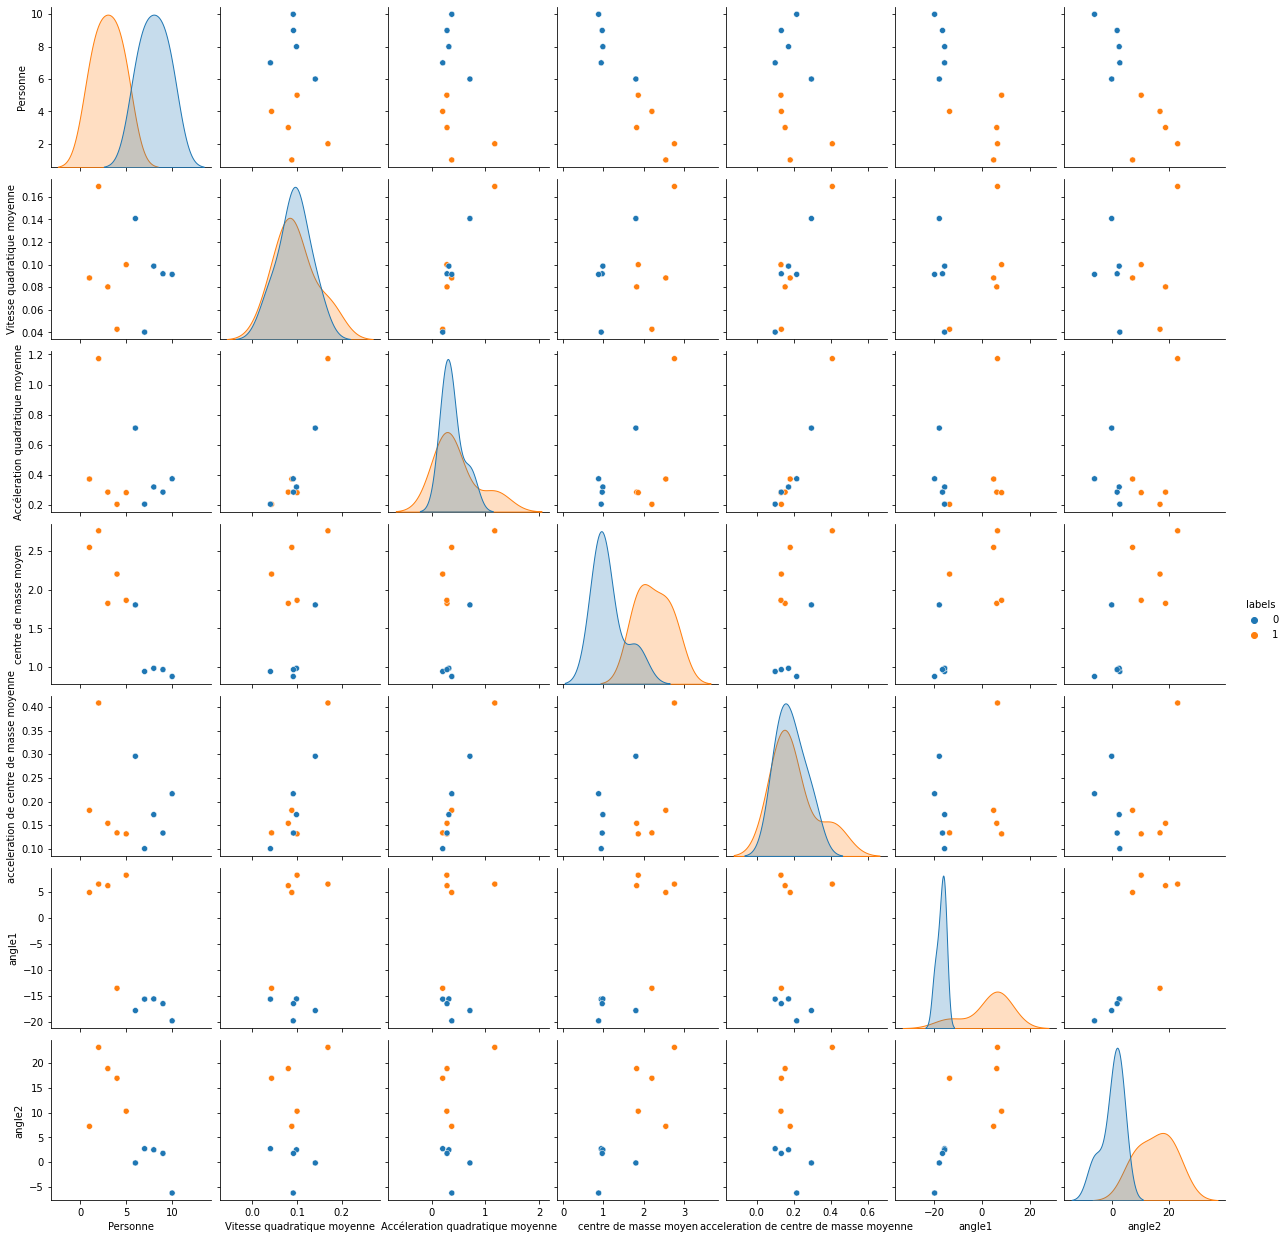

In [127]:
c=df.copy()
c['labels']=model.labels_
sns.pairplot(c,hue="labels")  #colorier les points dans le pairplot selon la classe

# Apprentissage supervisé

In [204]:
# Ajout de la colonne classe, qui sera le target dans notre apprentissage
# 1 : indique malade 
# 0 : indique sain

classe=[1, 1, 1, 1, 1, 0, 0, 0, 0, 0 ]

In [205]:
df['classe']=classe
df

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,centre de masse moyen,acceleration de centre de masse moyenne,angle1,angle2,vitesse angulaire moyenne,acceleration angulaire moyenne,vitesse de centre de masse moyenne,classe
1,1,0.088129,0.372414,2.545982,0.181312,4.944462,7.220784,0.386356,2.007141,4.591797e-02,1
2,2,0.169050,1.172249,2.759956,0.408659,6.560443,23.111439,0.512856,6.947285,8.859517e-02,1
3,3,0.080234,0.285283,1.823912,0.153858,6.255955,18.846133,0.307484,1.369508,3.473456e-02,1
4,4,0.042772,0.204505,2.201621,0.133541,-13.505002,16.895792,0.273512,1.325051,3.016698e-02,1
5,5,0.099894,0.282096,1.863105,0.131421,8.275950,10.266255,0.386053,1.449011,4.271759e-02,1
6,6,0.140703,0.710858,1.803930,0.295859,-17.797816,-0.147203,0.715306,4.411140,1.037751e+20,0
7,7,0.040229,0.205397,0.944860,0.100124,-15.595779,2.722685,0.230641,1.089484,2.157021e-02,0
8,8,0.098592,0.319519,0.985909,0.172258,-15.555762,2.500706,0.389558,1.663755,4.719750e-02,0
9,9,0.091834,0.285275,0.969427,0.133203,-16.459523,1.779652,0.411154,1.260415,9.681205e+39,0
10,10,0.091292,0.374042,0.880279,0.216462,-19.775901,-6.196245,0.499045,2.193129,5.750383e+50,0


In [130]:
# Partition de la base en target y (classe) et données x 

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#spliting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/5, random_state=0)

In [131]:
y_train=model.fit(x_train) # fit du  Training set
y_pred= model.predict(x_test) # tester le modéle en predire les targets test

In [132]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)) # Performance du modéle

1.0


In [133]:
#matrice de confusion
import sklearn
sklearn.metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)  

array([[1, 0],
       [0, 1]], dtype=int64)

In [134]:
y_pred

array([1, 0])

In [135]:
y_test

array([1, 0], dtype=int64)

## Modéle SVM

In [136]:
df

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,centre de masse moyen,acceleration de centre de masse moyenne,angle1,angle2,classe
1,1,0.088129,0.372414,2.545982,0.181312,4.944462,7.220784,1
2,2,0.169050,1.172249,2.759956,0.408659,6.560443,23.111439,1
3,3,0.080234,0.285283,1.823912,0.153858,6.255955,18.846133,1
4,4,0.042772,0.204505,2.201621,0.133541,-13.505002,16.895792,1
5,5,0.099894,0.282096,1.863105,0.131421,8.275950,10.266255,1
6,6,0.140703,0.710858,1.803930,0.295859,-17.797816,-0.147203,0
7,7,0.040229,0.205397,0.944860,0.100124,-15.595779,2.722685,0
8,8,0.098592,0.319519,0.985909,0.172258,-15.555762,2.500706,0
9,9,0.091834,0.285275,0.969427,0.133203,-16.459523,1.779652,0
10,10,0.091292,0.374042,0.880279,0.216462,-19.775901,-6.196245,0


In [137]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#spliting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/2, random_state=0)

In [138]:
# Fit du  Training set
from sklearn.svm import SVC
model2 = SVC(kernel = 'linear', random_state = 0)
model2.fit(X_train, y_train)

#Prediction sur le Test set
y_pred = model2.predict(X_test)

In [139]:
print(accuracy_score(y_test,y_pred)) # Performance du modéle

1.0


In [140]:
#matrice de confusion
import sklearn
sklearn.metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

array([[2, 0],
       [0, 3]], dtype=int64)

In [141]:
y_pred

array([1, 0, 1, 0, 1], dtype=int64)

In [142]:
y_test

array([1, 0, 1, 0, 1], dtype=int64)

## Modéle Regréssion Logistique

In [226]:
df['classe'] = [0,0,0,0,0,1,1,1,1,1]

In [227]:
df

,Personne,Vitesse quadratique moyenne,Accéleration quadratique moyenne,centre de masse moyen,acceleration de centre de masse moyenne,angle1,angle2,vitesse angulaire moyenne,acceleration angulaire moyenne,vitesse de centre de masse moyenne,classe
1,1,0.088129,0.372414,2.545982,0.181312,4.944462,7.220784,0.386356,2.007141,4.591797e-02,0
2,2,0.169050,1.172249,2.759956,0.408659,6.560443,23.111439,0.512856,6.947285,8.859517e-02,0
3,3,0.080234,0.285283,1.823912,0.153858,6.255955,18.846133,0.307484,1.369508,3.473456e-02,0
4,4,0.042772,0.204505,2.201621,0.133541,-13.505002,16.895792,0.273512,1.325051,3.016698e-02,0
5,5,0.099894,0.282096,1.863105,0.131421,8.275950,10.266255,0.386053,1.449011,4.271759e-02,0
6,6,0.140703,0.710858,1.803930,0.295859,-17.797816,-0.147203,0.715306,4.411140,1.037751e+20,1
7,7,0.040229,0.205397,0.944860,0.100124,-15.595779,2.722685,0.230641,1.089484,2.157021e-02,1
8,8,0.098592,0.319519,0.985909,0.172258,-15.555762,2.500706,0.389558,1.663755,4.719750e-02,1
9,9,0.091834,0.285275,0.969427,0.133203,-16.459523,1.779652,0.411154,1.260415,9.681205e+39,1
10,10,0.091292,0.374042,0.880279,0.216462,-19.775901,-6.196245,0.499045,2.193129,5.750383e+50,1


In [228]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#spliting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [229]:
model3 = LogisticRegression (tol =0.1)

In [230]:
model3.fit(X_train,y_train)

C:\Users\Eya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [231]:
y_predict=model3.predict(X_test)
y_predict

array([0, 0, 0], dtype=int64)

In [232]:
y_test = np.array(y_test)
y_test

array([1, 0, 0], dtype=int64)

In [233]:
print(accuracy_score(y_test,y_predict)) # Performance du modéle

0.6666666666666666


In [234]:
#matrice de confusion
import sklearn
sklearn.metrics.confusion_matrix(y_test, y_predict,  labels=None, sample_weight=None, normalize=None)

array([[2, 0],
       [1, 0]], dtype=int64)

In [235]:
y_predict

array([0, 0, 0], dtype=int64)

In [236]:
y_test

array([1, 0, 0], dtype=int64)